In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!pip install -q pyngrok

!pip install -q streamlit

!pip install -q streamlit_ace

     |████████████████████████████████| 745 kB 13.7 MB/s 
     |████████████████████████████████| 9.9 MB 15.8 MB/s 
     |████████████████████████████████| 4.3 MB 47.0 MB/s 
     |████████████████████████████████| 181 kB 69.6 MB/s 
     |████████████████████████████████| 164 kB 59.1 MB/s 
     |████████████████████████████████| 76 kB 4.3 MB/s 
     |████████████████████████████████| 111 kB 73.2 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 128 kB 53.3 MB/s 
     |████████████████████████████████| 793 kB 59.4 MB/s 
     |████████████████████████████████| 380 kB 61.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.28 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.9.

In [3]:
import streamlit as st
from pyngrok import ngrok

In [4]:
dataset=pd.read_csv("/content/Fraud.csv")

In [5]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [6]:
dataset.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
83556,10,PAYMENT,7705.70,C1834114901,96490.0,88784.30,M1214836727,0.00,0.00,0.0,0.0
83557,10,CASH_OUT,319045.01,C1964329082,56471.0,0.00,C699133054,0.00,319045.01,0.0,0.0
83558,10,CASH_IN,249169.96,C1421944154,3481.0,252650.96,C790672270,38177.07,0.00,0.0,0.0
83559,10,CASH_OUT,244279.64,C722886752,29968.0,0.00,C1492538502,25680.00,269959.64,0.0,0.0
83560,10,CASH_OUT,145014.63,C60491101,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,83561.000000,8.356100e+04,8.356000e+04,8.356000e+04,8.356000e+04,8.356000e+04,83560.000000,83560.0
mean,8.204473,1.684883e+05,8.888170e+05,9.055016e+05,8.661407e+05,1.180913e+06,0.001340,0.0
std,1.859640,3.363563e+05,2.731026e+06,2.769537e+06,2.397540e+06,2.826509e+06,0.036587,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,9.550620e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,4.873624e+04,1.987300e+04,0.000000e+00,1.938916e+04,3.685593e+04,0.000000,0.0
75%,9.000000,2.056751e+05,1.795912e+05,2.019698e+05,5.561267e+05,1.019467e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.130692e+07,3.197699e+07,1.000000,0.0


In [8]:
dataset.select_dtypes(include="object")

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703
...,...,...,...
83556,PAYMENT,C1834114901,M1214836727
83557,CASH_OUT,C1964329082,C699133054
83558,CASH_IN,C1421944154,C790672270
83559,CASH_OUT,C722886752,C1492538502


In [9]:
dataset.select_dtypes(include=["int64","float64"]).columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [10]:
len(dataset.select_dtypes(include=["int64","float64"]).columns)

8

In [11]:
len(dataset.select_dtypes(include="object").columns)

3

In [12]:
dataset.isnull().values.any()

True

#dealing with null values

In [13]:
dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [14]:
dataset.select_dtypes(include=["int64","float64"]).columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

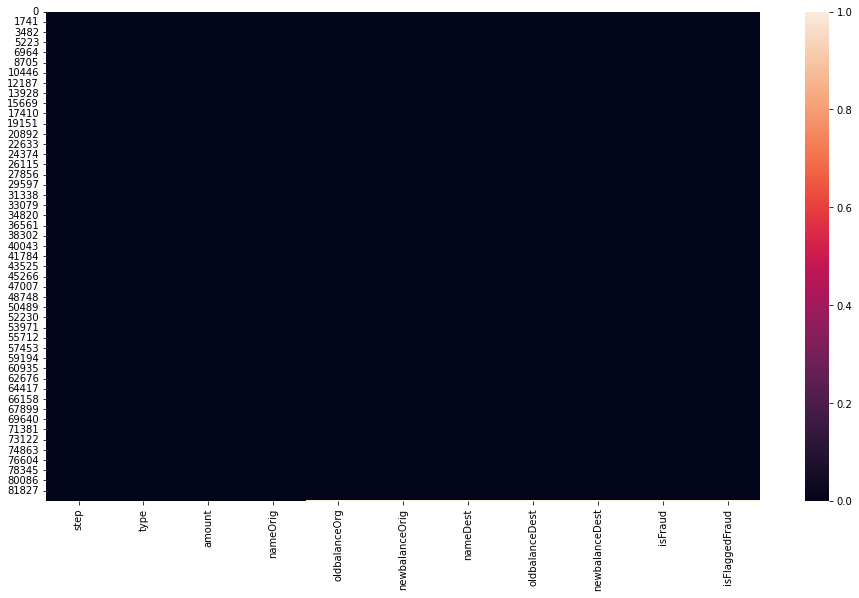

In [15]:
plt.figure(figsize=(16,9))
sns.heatmap(dataset.isnull())
plt.show()

In [16]:
#num columns with null values
#amount,'oldbalanceOrg','newbalanceOrig','newbalanceDest',"isFraud"
dataset['amount']=dataset['amount'].fillna(dataset['amount'].mean())
dataset['oldbalanceOrg']=dataset['oldbalanceOrg'].fillna(dataset['oldbalanceOrg'].median())
dataset['newbalanceOrig']=dataset['newbalanceOrig'].fillna(dataset['newbalanceOrig'].median())
dataset['oldbalanceDest']=dataset['oldbalanceDest'].fillna(dataset['oldbalanceDest'].median())
dataset['newbalanceDest']=dataset['newbalanceDest'].fillna(dataset[  'newbalanceDest'].median())



In [17]:
dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          1
oldbalanceDest    0
newbalanceDest    0
isFraud           1
isFlaggedFraud    1
dtype: int64

In [18]:
dataset['nameOrig']=dataset['nameOrig' ].fillna(dataset['nameOrig'].mode()[0])

In [19]:
dataset['nameDest']=dataset['nameDest' ].fillna(dataset['nameDest'].mode()[0])

In [20]:
dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           1
isFlaggedFraud    1
dtype: int64

In [21]:
dataset['isFraud']= dataset['isFraud' ].fillna(dataset['isFraud'].mode()[0])


In [22]:
dataset.drop(columns='isFlaggedFraud')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
83556,10,PAYMENT,7705.70,C1834114901,96490.0,88784.30,M1214836727,0.00,0.00,0.0
83557,10,CASH_OUT,319045.01,C1964329082,56471.0,0.00,C699133054,0.00,319045.01,0.0
83558,10,CASH_IN,249169.96,C1421944154,3481.0,252650.96,C790672270,38177.07,0.00,0.0
83559,10,CASH_OUT,244279.64,C722886752,29968.0,0.00,C1492538502,25680.00,269959.64,0.0


In [23]:
dataset.drop(columns='newbalanceOrig')

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
83556,10,PAYMENT,7705.70,C1834114901,96490.0,M1214836727,0.00,0.00,0.0,0.0
83557,10,CASH_OUT,319045.01,C1964329082,56471.0,C699133054,0.00,319045.01,0.0,0.0
83558,10,CASH_IN,249169.96,C1421944154,3481.0,C790672270,38177.07,0.00,0.0,0.0
83559,10,CASH_OUT,244279.64,C722886752,29968.0,C1492538502,25680.00,269959.64,0.0,0.0


In [24]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [25]:
dataset=dataset.drop(columns=['newbalanceOrig','isFlaggedFraud'])

In [26]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,M1230701703,0.0,0.0,0.0


In [27]:
dataset.isnull().values.any()

False

# dealing with categorical data

In [28]:
dataset.select_dtypes(include="object").columns

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [29]:
dataset['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [30]:
dataset['nameOrig'].unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1421944154',
       'C722886752', 'C60491101'], dtype=object)

In [31]:
dataset=dataset.drop(columns=['nameOrig','nameDest'])

In [32]:
dataset.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.0,0.0,1.0
3,1,CASH_OUT,181.00,181.0,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,41554.0,0.0,0.0,0.0


In [33]:
dataset=pd.get_dummies(data=dataset,drop_first=True)

In [34]:
dataset.head()

,step,amount,oldbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,0.0,0.0,0.0,0,0,1,0
1,1,1864.28,21249.0,0.0,0.0,0.0,0,0,1,0
2,1,181.00,181.0,0.0,0.0,1.0,0,0,0,1
3,1,181.00,181.0,21182.0,0.0,1.0,1,0,0,0
4,1,11668.14,41554.0,0.0,0.0,0.0,0,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


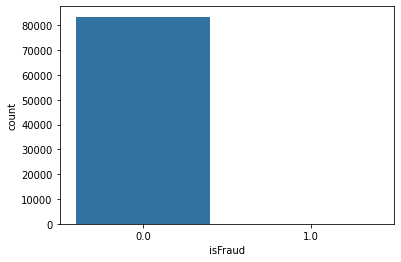

In [35]:
sns.countplot(dataset['isFraud'])

# Data analysis

# Splitting the dataset

In [36]:
x=dataset.drop(columns='isFraud')

In [37]:
y=dataset['isFraud']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)

In [40]:
x_train.shape

(66848, 9)

In [41]:
y_train.shape

(66848,)

In [42]:
y_test.shape

(16713,)

In [43]:
x_test.shape

(16713, 9)

# Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc=StandardScaler()

In [46]:
x_train=sc.fit_transform(x_train)

In [47]:
x_test=sc.transform(x_test)

# Training the  model

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
classifier_lr=LogisticRegression(random_state=0)

In [50]:
y_train.shape

(66848,)

In [51]:
classifier_lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [52]:
y_pred=classifier_lr.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [54]:
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
pre=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [55]:
results=pd.DataFrame([['logistic Regression',acc,f1,pre,rec]],
                      columns=['Model','Accuracy','F1 score','Precision score','Recall score'])

In [56]:
results

,Model,Accuracy,F1 score,Precision score,Recall score
0,logistic Regression,0.998803,0.090909,1.0,0.047619


In [57]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[16692     0]
 [   20     1]]


In [58]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier_lr,X=x_train,y=y_train,cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("standard Deviation is {:.2f}".format(accuracies.std()*100))

Accuracy is 99.87 %
standard Deviation is 0.01


In [59]:
dataset.head()

,step,amount,oldbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,0.0,0.0,0.0,0,0,1,0
1,1,1864.28,21249.0,0.0,0.0,0.0,0,0,1,0
2,1,181.00,181.0,0.0,0.0,1.0,0,0,0,1
3,1,181.00,181.0,21182.0,0.0,1.0,1,0,0,0
4,1,11668.14,41554.0,0.0,0.0,0.0,0,0,1,0


In [60]:
singleobs=[[1,8789,12345,3456,2345,0,1,1,0]]

In [61]:
pred=classifier_lr.predict(singleobs)

In [62]:
print(pred)

[1.]


In [63]:
if(pred==[0.]):
  print("Not Fraud")
else:
  print("Fraud")

Fraud


In [64]:
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(classifier_lr, pickle_out) 
pickle_out.close()

In [65]:
pickle_in = open('classifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)

In [66]:
dataset.head()

,step,amount,oldbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,0.0,0.0,0.0,0,0,1,0
1,1,1864.28,21249.0,0.0,0.0,0.0,0,0,1,0
2,1,181.00,181.0,0.0,0.0,1.0,0,0,0,1
3,1,181.00,181.0,21182.0,0.0,1.0,1,0,0,0
4,1,11668.14,41554.0,0.0,0.0,0.0,0,0,1,0


In [74]:
%%writefile app.py
import pickle
import streamlit as st
 
# loading the trained model
pickle_in = open('classifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)
@st.cache()
  
def predictor(step,amount,oldbalanceOrg,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER):
  if type_CASH_OUT==1:
    type_DEBIT=0
    type_PAYMENT=0
    type_TRANSFER=0
  if type_DEBIT==1:
    type_CASH_OUT=0
    type_PAYMENT=0
    type_TRANSFER=0
  if type_PAYMENT==1:
    type_DEBIT=0
    type_CASH_OUT=0
    type_TRANSFER=0
  if type_TRANSFER==1:
    type_DEBIT=0
    type_PAYMENT=0
    type_CASH_OUT=0
  predictor = classifier.predict( 
        [[step,amount,oldbalanceOrg,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER]])
  if predictor == 0:
        pred ='Not Fraud'
  else:
        pred = 'Fraud'
  return pred
def main():       
  # front end elements of the web page 
  html_temp = """ 
  <div style ="background-color:yellow;padding:13px"> 
  <h1 style ="color:black;text-align:center;">Streamlit Fraud Prediction ML App</h1> 
  </div> 
  """
      
    # display the front end aspect
  st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
  step = st.number_input("Enter step")
  amount= st.number_input("Enter amount") 
  oldbalanceOrg = st.number_input("Enter the old balance") 
  oldbalanceDest= st.number_input("Enter old balance destination")
  newbalanceDest = st.number_input("Enter the new balance destination")
  type_CASH_OUT=st.number_input("Enter if cashout(Yes-1,No-0")
  type_DEBIT=st.number_input("Enter if debit(Yes-1,No-0")
  type_PAYMENT=st.number_input("Enter if payment(Yes-1,No-0")

  type_TRANSFER=st.number_input("Enter if transfer(Yes-1,No-0")
  st.success('The customer')
      
    # when 'Predict' is clicked, make the prediction and store it 
  if st.button("Predict"): 
      result = predictor(step,amount,oldbalanceOrg,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER)
      st.success('The customer is {}'.format(result))
      print(result)
  
if __name__=='__main__': 
    main()



Overwriting app.py


In [76]:
!streamlit run app.py&npx localtunnel --port 8501

2022-03-08 15:09:20.404 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.204.244.168:8501

  Stopping...
^C
